# Section 0: Statistical Background
This section will cover some statistical basics for those who are new to the field - please feel free to skip ahead to Section 1 if you are familiar with statistical distributions including the Weibull distribution.
## 0.1 Probability Density Functions and Cumulative Density Functions
A *Probability Density Function (PDF)* is a function, $f(x)$ whose value represents the relative *likelihood* that if we select a random value it will be equal to $x$. The probability distribution function of a variable is entirely determined by its *statistical distribution* and its *parameters*. For this tutorial we will be focused on the *Weibull distribution* whose PDF is defined as 
$$f(x) = \begin{cases} \frac{k}{A}\left(\frac{x}{A}\right)^{k-1}e^{-\left(\frac{x}{A}\right)^k} & \text{ if } x \geq 0\\
0 & \text{ otherwise.} \end{cases}$$
Let us consider an example Weibull PDF, showing the likelihood of failure at a given time
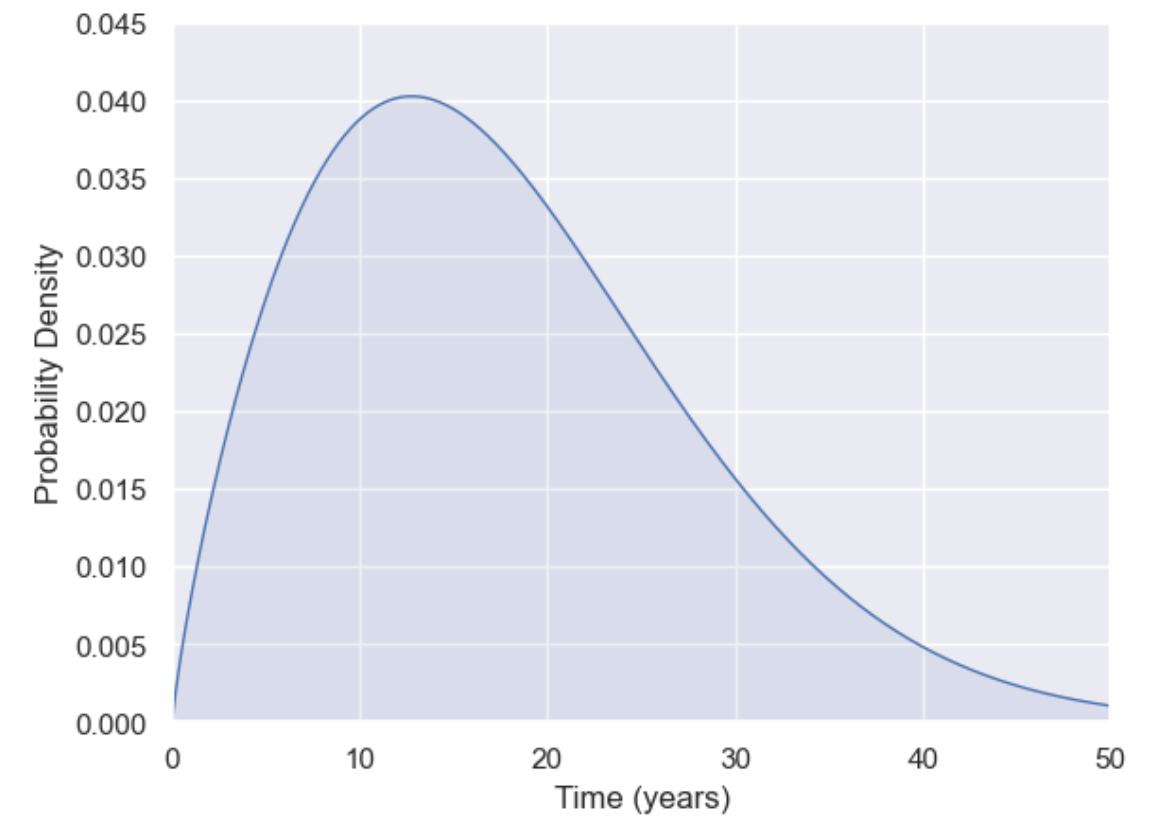Let's think of the failure rate at the first time steps of year 10 and year 20
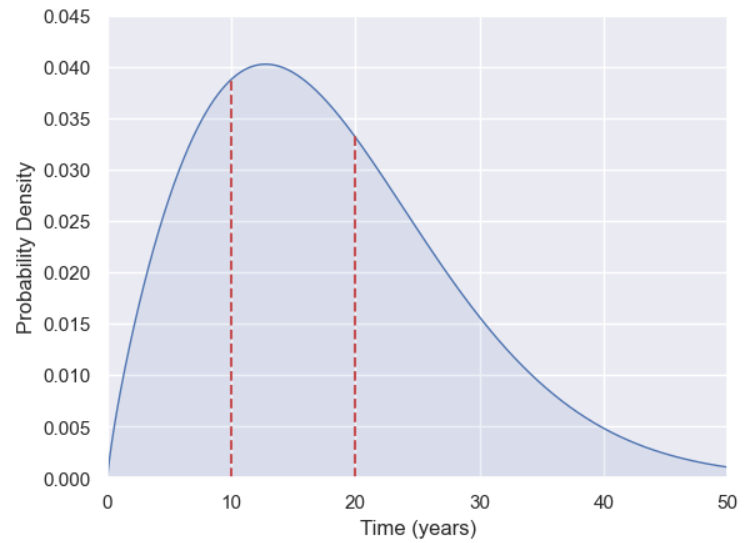
We can see that the *likelihood* of failure at the start of year 10 is higher than the likelihood of failure at the start of year 20. This is useful for comparison but it's hard to understand what this likelihood really represents - a more tangible figure is the *probability of occurance*, $P(x)$. To convert probability density to probability we integrate the PDF to get the area under the curve. For a single point, $x$, this gives
$$P(X=x)=\int^x_x f(t) \ dt = 0,$$
since the probability of a given point in infinite space is necessarily 0. We can gain more insight from integrating over an interval 
$$P(X\in [x_1, x_2])=P(x_1\leq X \leq x_2) = \int^{x_2}_{x_1} f(t) \ dt$$
giving us the probability that the value $X$ lies between the lower limit $x_1$ and the upper limit $x_2$. For example the probability of failure occurring between the start of year 10 and the start of year 20 is equal to the area of the shaded region below.
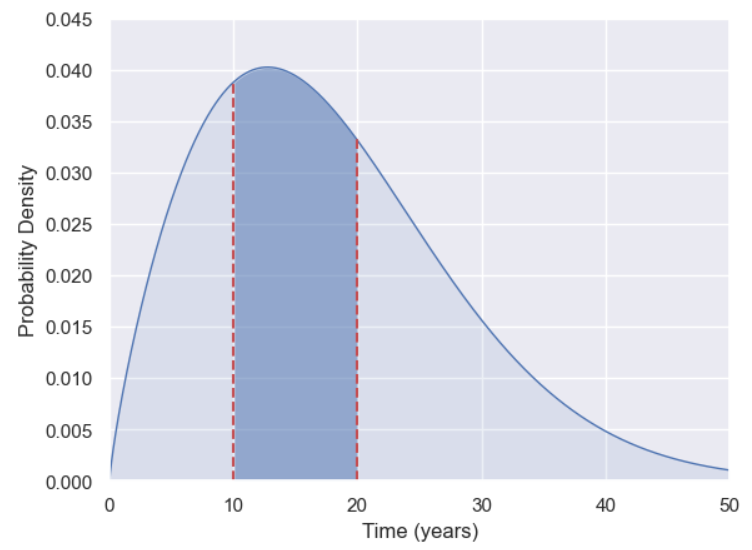
If we set the lower bound, $x_1$ equal to 0, we then gain the probability that failure occurs *before* this time. For example the probability of failure occurring before year 20 is given by this shaded region.
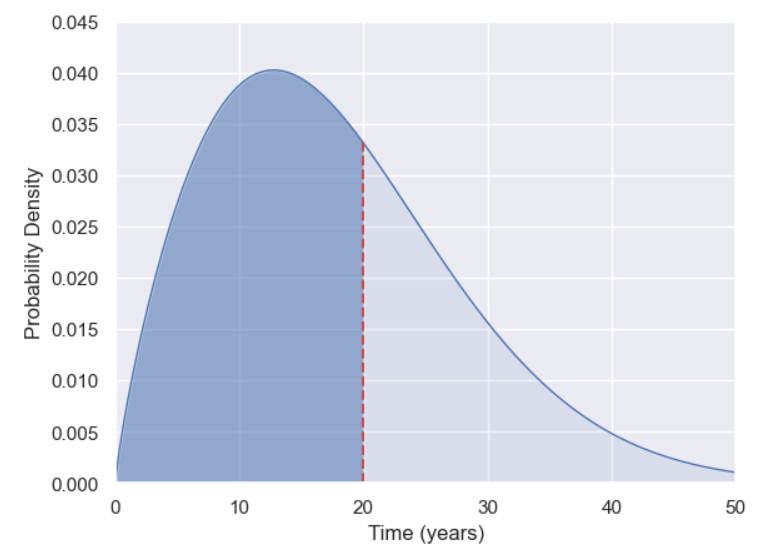
This integral is a special case, representing the *Cumulative Distribution Function (CDF)*, $F(x)$, defined as
$$F(x)=P(X\leq x)=P(0\leq X \leq x) = \int^x_0 f(t) \ dt.$$
The equivalent CDF is given below
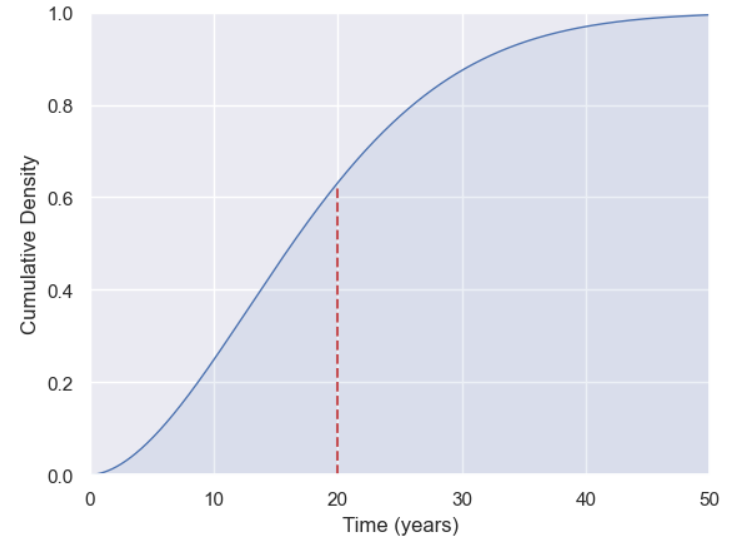
indicating that the probability of failure before year 20 is a little over 0.6.

### 0.2 Generating Distributional Data with Scipy
There are lots of useful Python packages that allow us to draw from a number of distributions. The below interactive cells will use the scipy.stats module to generate Weibull data, however a number of continuous distributions can be used, for more information visit the docs [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous).
1]

In [1]:
# Import package and nickname
import scipy.stats as stats

The rvs function within python allows us to generate random variables. The function takes the following arguments:
* c - this denotes the shape parameter of the Weibull distribution which we often write as $k$ or $\beta$
* loc - this denotes the location parameter of the Weibull distribution which we generally assume to be 0
* scale - this denotes the scale parameter of the Weibull distribution
* size - this is the number of random variables we wish to generate, or the sample size

In [2]:
# We can generate random variables from the Weibull distribution using the following command
weibull_rvs = stats.weibull_min.rvs(c=2, loc=0, scale=30, size=1000)

In order to visualize this we can use the matplotlib package to plot the data we have generated.

In [3]:
# Import package and nickname
import matplotlib.pyplot as plt

We can use the hist function to view a histogram of the random variables we have generated. This allows us to look at the shape of the data and gives us an estimate of what the probability density function looks like. We can see it follows a roughly Weibull shape.

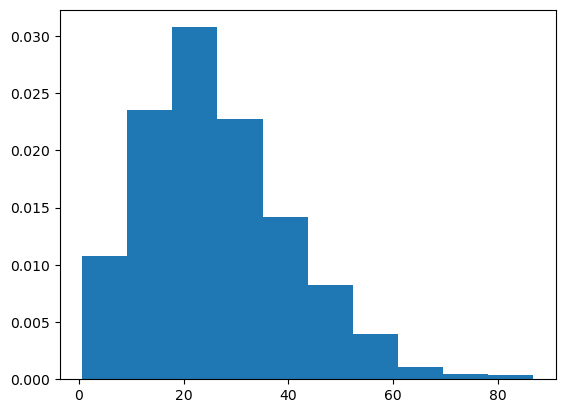

In [4]:
hist = plt.hist(weibull_rvs, density=True)

We can optionally use the seaborn package to improve the appearance of this plot, and use features of matplotlib to add axis labels

Text(0, 0.5, 'Frequency')

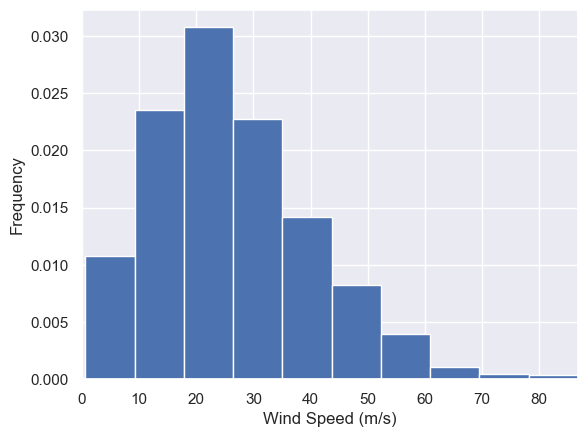

In [5]:
# Import and nickname
import seaborn as sns

sns.set_theme() # use seaborn theme

hist = plt.hist(weibull_rvs, density=True) # plot

# Limit x-axis to existing values
plt.xlim(0,max(weibull_rvs))

# Write axis labels
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

We can also use the numpy package to understand various traits of this data such as the mean time until failure. This package comes equipped with many useful mathematical and statistical functions

In [6]:
# Import and nickname
import numpy as np

In the cell below we use the numpy package to calculate the mean time until failure, and to round this value for printing.

In [7]:
mttf = np.mean(weibull_rvs)

print(f'MTTF = {np.round(mttf,2)}')

MTTF = 26.55


## 0.3 Weibull Parameters
Let's have a more in depth look at the parameters we used for data generation

Let's have a more in depth look at the parameters we used for data generation.

The *shape parameter* is given by the argument $c$ for the scipy function, although we typically denote it by $k$. This value determines how the occurrence behaviour changes over time. In the failure rate context this means:
* k < 1: Failure rate is decreasing over time
* k = 1: Constant failure rate not changing with time
* k > 2: Failure rate is increasing over time

Increasing this value pushes the distribution to the right, with the peak later in time. Conversely decreasing this value pushes the distribution to the left, with the peak earlier in time.

### Exercise 0.1
Use the cell below to adjust the value of the shape parameter $c$ and look at how it affects the shape of the distribution.

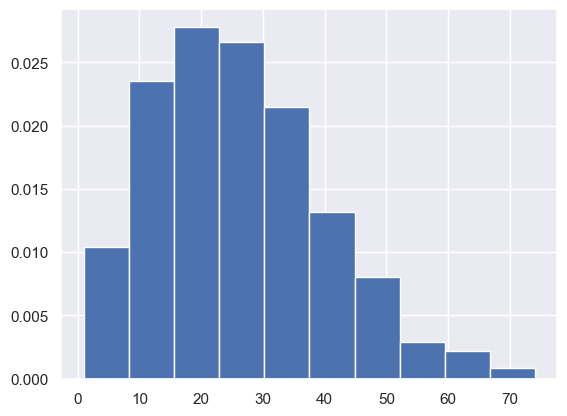

In [8]:
k = 2
weibull_rvs = stats.weibull_min.rvs(c=k, loc=0, scale=30, size=1000)
hist = plt.hist(weibull_rvs, density=True)

The other significant parameter we are interested in is the *scale* parameter, $A$. This value represents the "characteristic life," signifying the time at which 63.2% of the population in a given sample is expected to fail. As we increase this value the mean time till failure increases, conversely as we decrease this value the mean time till failure decreases.

## Exercise 0.2
Use the cell below to adjust the value of $A$, and see how it affects the mean time till failure.

In [9]:
A = 30
weibull_rvs = stats.weibull_min.rvs(c=k, loc=0, scale=A, size=1000)
print(f'A = {A} \nMTTF = {np.round(np.mean(weibull_rvs),2)} years')

A = 30 
MTTF = 26.91 years


These two parameters in combination give us all the information we need to know about the Weibull distribution!

## 0.4 Parameter Estimation and Distribution Fitting
We've seen in the previous section how we can use the shape and scale parameter to describe a Weibull distribution but when we're working with a dataset these are often unknown values. We can work out the most likely parameters from given data using a technique called *Maximum Likelihood Estimation*. This follows from the fact that the probability density function gives the relative likelihood of a given value.
First let us consider a single data point - let's assume we have observed a single failure at time $t=20$. Then the relative likelihood, $L$ of us having observed this value given our Weibull parameters is given by 
$$L(t; A,k) = f(t) = f(20) = \frac{k}{A}\left(\frac{20}{A}\right)^{k-1}e^{-\left(\frac{20}{A}\right)^k},$$
which we can say contains only two unknowns: $A$ and $k$. In order to maximize the likelihood we therefore wish to alter these two values until we maximize the value of $f(t)$. 

Extending to the case with an entire dataset
$$T= [t_1,t_2,\cdots, t_n],$$ we wish to combine these likelihoods. To do so, we simply multiply our respective probabilities as follows to calculate likelihood given our observed data and Weibull parameters
$$L(T;A,k)= f(t_1)\cdot f(t_2) \cdots f(t_{n-1})\cdot f(t_n),$$
we often write this using the product notation as
$$L(T;A,k) = \prod^n_{i=1} f(t_i) = \prod^n_{i=1}\frac{k}{A}\left(\frac{t_i}{A}\right)^{k-1}e^{-\left(\frac{20}{A}\right)^k}.$$

Clearly, identifying the maximum of this equation is not an easy task. One way to simplify this is to take the logarithm of the equation. Log rules allow us to convert multiplication into addition as follows
$$l(T;A,k)=log(L)=\sum^n_{i=1}\frac{k}{A}\left(\frac{t_i}{A}\right)^{k-1}e^{-\left(\frac{20}{A}\right)^k}.$$

We then wish to find the values of $A$ and $k$ which minimize $l(T; A,k)$.

The following code allows us to use the scipy.stats package to identify the most likely parameters of this distribution given observed data. We should hopefully see that the estimations from our generated data is close to the true parameter values.

In [10]:
(shape, loc, scale) = stats.weibull_min.fit(weibull_rvs, floc=0)

print(f'Estimated shape parameter: {np.round(shape,2)}')
print(f'Estimated scale parameter: {np.round(scale,2)}')
print(f'True shape parameter: {np.round(k,2)}')
print(f'True scale parameter: {np.round(A,2)}')

Estimated shape parameter: 2.04
Estimated scale parameter: 30.36
True shape parameter: 2
True scale parameter: 30


We can also assess the goodness of fit visually by plotting the Weibull PDF against the data histogram.

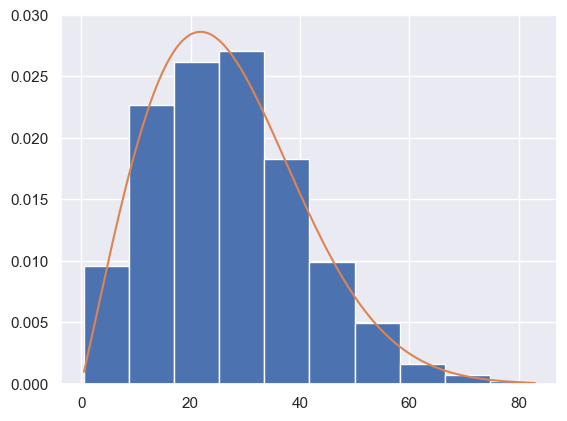

In [11]:
# Plot data histogram
hist = plt.hist(weibull_rvs, density=True)

# Generate equally spaced intervals between the smallest and largest random variable seen
X = np.linspace(min(weibull_rvs), max(weibull_rvs), 1000)

# Calculate the probability density at each x in X
Y = [stats.weibull_min.pdf(x, c=shape, scale=scale, loc=0) for x in X]

# Plot the pdf curve
plt.plot(X,Y)

# What is Survival Analysis?

Survival analysis is a branch of statistics working specifically with time-to-event data, the event in this context referring to a component failure or replacement. Within wind energy, it provides us with tools to do the following
* Analyse failure behaviour
* Understand how failure behaviour and failure rate change over time
* Understand how different factors affect failure behaviour
* Incorporate incomplete (censored) data
* Quantify uncertainty for failure behaviour statistics

## Survival Data and Right-Censoring
Survival data is a set of time-to-event data points each consisting of at least 2 components:
* Time
* Status $\delta_i=
    \begin{cases}
        1 & \text{if component has failed}\\
        0 & \text{otherwise (censored}
    \end{cases}$

The time element is the time of an observed event, where the event is either 1 to indicate failure or 0 to indicate censorship. In this context censoring tends to refer to where during a study period or data sat we have a component that has not yet failed. This data should not be ignored and still provides us valuable information: a lower limit for the true event time of this component. This type of censoring is referred to as *right-censoring* because we know that the event time lies to the *right* (or to the future) of the observed time. To understand why this data is important consider a scenario where we have 20 generators, one of which has failed in year 2 of operation. If we estimated the mean time to failure of this farm, only including the failed component would give us an expected failure time of 2 years, whilst the remainder of the components might survive their design life of 20, or even 30 years! How we incorporate this data, though, is less intuitive and requires some statistical inference!

The cells below use the pandas package to import some example survival data

In [12]:
# Import and nickname
import pandas as pd

In [13]:
# Import data
survival_data = pd.read_csv('Example_failure_data.csv')

# Show the top part of the dataframe
survival_data.head()

,Time,Event,Manufacturer
0,20.000000,0,1
1,20.000000,0,0
2,20.000000,0,0
3,10.674239,1,0
4,20.000000,0,0


## The Survival Function
One of the primary aims of survival analysis is to best estimate the *survival function*, $S(t)$, the probability of surviving beyond a given time $t$. Closely related to the cumulative distribution of failures by,
$$S(t)=1-F(t),$$ this can be understood as the probability of "not-having-failed" by time $t$. This function allows users to estimate and visualise the proportion of a population surviving at each time and may be used to infer expected number of failures and related costs up to a time, $t$, or over an interval. 

The field contains a variety of methods for estimating survival whilst incorporating censoring, allowing us to make accurate estimates from all the information available. Let's try out some of them!

### The Kaplan-Meier Estimator
The Kaplan-Meier estimator is a *non-parameteric* (empirical) estimator for the survival function. This means that it makes no assumptions about the underlying distribution of failures, taking only the information that is observed without making inferences. The non-parametric nature of Kaplan-Meier allows us to produce robust estimates using intuitive methods when sufficient data is provided.
\subsection{Estimating Survival Probability}
\textit{Survival probability} over a time, $s_t$, is the conditional probability of surviving past time $t$, given survival up to that point. Whilst in theory, this is a smooth function of continuous times, in practise we observe discrete time periods of equal length and take a time, $t$, to represent the interval $[t, t+1)$. These discrete time probabilities can then be estimated by the proportion of subjects surviving the observed interval (i.e. dividing the number alive at the end of an interval by those alive at the start):
$$s_t=\frac{N_{t, end}}{N_{t, start}},$$
    where 
  $N_k$  is the number of subjects surviving at point $k$.
  
#### Estimating the Survival Function
The *Kaplan-Meier estimator* for the survival function, $\hat{S}_{KM}(T)$, is the product of the estimated survival probabilities. Formally,
    $$\hat{S}_{KM}(t)=\prod_{i=1}^{t} s_i.$$
In the absence of censoring, the number surviving interval $i$ is equivalent to the population at the start of interval $i+1$. In this case the proportion surviving beyond $t$ is estimated by the remaining proportion of the population at the end of time $t$, $$\hat{S}(t)=\frac{N_{t,end}}{N_0}.$$

We are going to use a package called reliability to calculate the Kaplan-Meier estimator.

In [14]:
pip install reliability

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
# Import package
import reliability

The package reliability typically takes in data as a list of failure times, and a list of right-censored times. Let's use pandas to split our data.

In [16]:
# split data into failure and censors using logic statements
failure_data = survival_data[survival_data['Event']==1]
censor_data = survival_data[survival_data['Event']==0]

# Extract time columns
failure_times = failure_data.Time
censor_times = censor_data.Time

We can now use the reliability function KaplanMeier from the Nonparametric module to calculate and plot a Survival curve using the Kaplan Meier estimator.

Text(0, 0.5, 'Survival Function, S(t)')

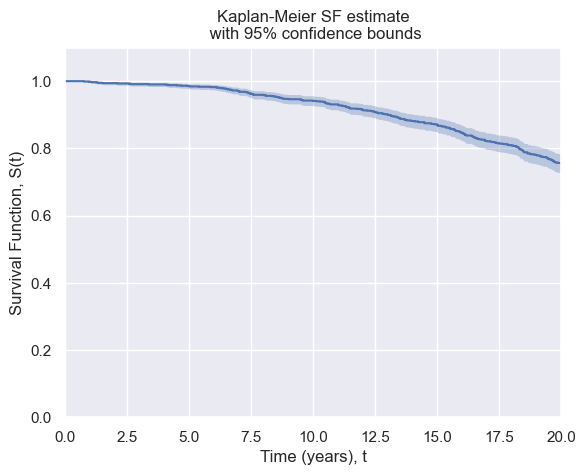

In [17]:
km = reliability.Nonparametric.KaplanMeier(failure_times, censor_times, print_results=False)
plt.xlabel('Time (years), t')
plt.ylabel('Survival Function, S(t)')

This function produces explictly the data it plots, so we can interpolate values in the middle. We can use this to infer important KPIS such as $S_{n}$ if at least n% of the population has failed. However, extrapolation is not possible with this method so if we wished to calculate the Mean Time To Failure for a population, at least half must have already failed. This is not very helpful for predictive purposes. For this case, it is better for us to use parametric methods where we fit a distribution to the data. 

## Parametric Method
The introductory section describes how we fit a distribution where we have all the data. This basic principle stays, but we wish to alter the methodology to incorporate censored data. Before we considered one type of data, where an event has occurred. A data point of this type has likelihood under Weibull of
$$L(t_{event}; A,k) = f(t_{event}) = \frac{k}{A}\left(\frac{t_{event}}{A}\right)^{k-1}e^{-\left(\frac{t_{event}}{A}\right)^k}.$$
We know the combined likelihood of all data points of this type observed is 
$$L(T_{event};A,k) = \prod^n_{i=1} f(t_i) = \prod^n_{i=1}\frac{k}{A}\left(\frac{t_i}{A}\right)^{k-1}e^{-\left(\frac{20}{A}\right)^k}.$$
We now wish to consider the likelihood of an event *not* having occurred. This is the probability that the event time occurs later than the observed time. This is equivalent to 
$$L(t_{censor}; A,k)=1-F(t_{censor})=1-\left(1-e^{-At_{censor}^k}\right)=e^{-At_{censor}^k},$$
which combine as 
$$L(T_{censor};A,k) = \prod^n_{i=1} f(t_i) = \prod^n_{i=1}e^{-At_{censor}^k}.$$
We now multiply these together to get a likelihood for the entire dataset
$$L(T;A,k) = \left(\prod^n_{i=1} f(t_i) = \prod^n_{i=1}e^{-At_{censor}^k}\right) \left(\prod^n_{i=1}\frac{k}{A}\left(\frac{t_i}{A}\right)^{k-1}e^{-\left(\frac{20}{A}\right)^k}\right).$$
Optimizing this equation in terms of $A$ and $k$ will now give us optimal parameters which account for *all* data and observations.

The reliability package has functionality to carry this out.

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 225/800 (78.04878% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha          36.948         1.96759    33.286   41.0129
     Beta         2.08829        0.131876   1.84517   2.36343 

Goodness of fit    Value
 Log-likelihood -1153.99
           AICc  2311.99
            BIC  2321.84
             AD  3363.35 



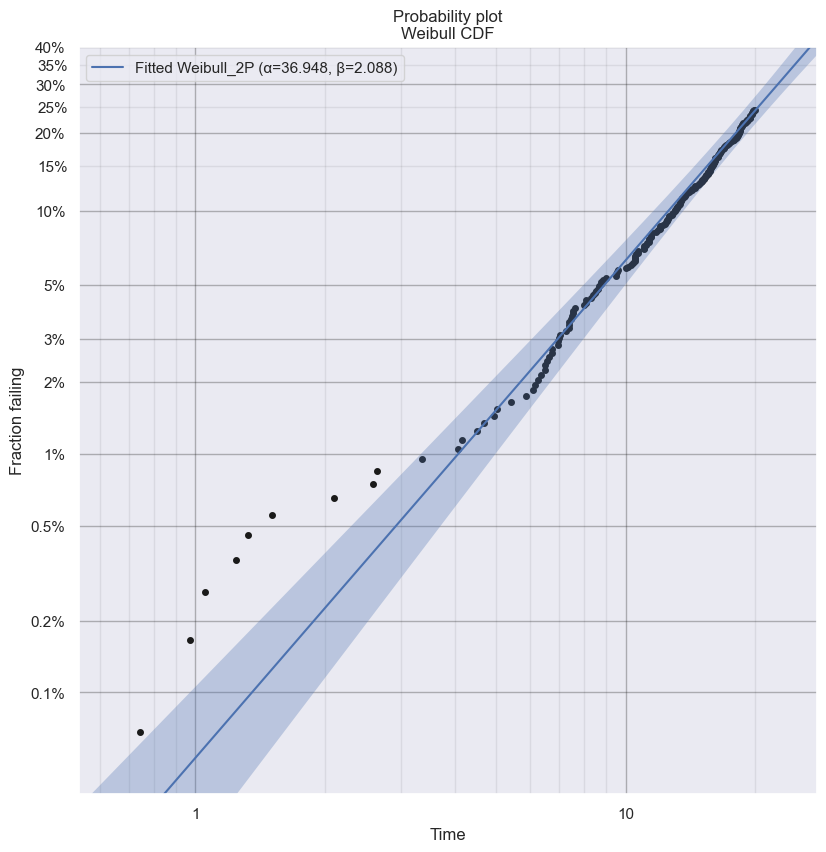

In [18]:
# import package
from reliability.Fitters import Fit_Weibull_2P

# Fit to data
fitted_weibull = Fit_Weibull_2P(list(failure_times), list(censor_times))

# Access parameters
scale = fitted_weibull.alpha
shape = fitted_weibull.beta

These parameters can then be used to determine the probability of failure, or survival until, any positive finite time. Similarly, any $S_n$ value can be predicted. We know that the probability of se this equation and find 
$$S_n = \sqrt[k]{\frac{log(n)}{A}}.$$

In [20]:
n = 10
sn = (np.log(1-n/100)/A)**1/k

We can also calculate the Mean Time To Failure as
$$MTTF = A \Gamma\left(1+\frac{1}{k}\right),$$
where $\Gamma$ is the gamma function.

In [21]:
# Import the gamma function
from scipy.special import gamma as gamma_func

# Calculate and print MTTF
mttf = scale*gamma_func(1+1/shape)
print(f'MTTF = {np.round(mttf, 1)} years')

MTTF = 32.7 years


# Cox Proportional-Hazards

The Cox Proportional-Hazards (Cox-PH) model is a regression model used to estimate the effect of one or more variables on the failure rate. This model assumes that increasing a variable by 1 will multiply its chance of of failing at a given time by some constant. This means that the failure rate of components with a difference in variable value of 1 have a constant ratio - known as the *hazard ratio*. 


## The Hazard Function
The *hazard function*, $h(t)$, is the probability of failure occurring at $t$. Within industry this is often referred to as the failure rate. For a total of $n$ components we assume that the $i^{th}$ has an individual hazard function defined by
$$h_i(t)=c_i \cdot h_0(t),$$
where $h_0$ is the underlying hazard function consistent across all $n$ components, and $c_i$ is a constant determined by the individual's covariate values.
Specifically, $$c_i = \prod^n_{
j=1}r_j^{x_{i,j}},$$ with $r_j$ and $x_{i,j}$ denoting the hazard ratio and value for covariate $j$ respectively. With known covariate values, and hazard ratios estimated via the Cox-PH method we can gain a better understanding for the failure behaviour of an individual component. 


## Cox Proportional-Hazards Estimation
The Cox-PH method estimates the hazard ratios by maximising the partial likelihood function ($PL$) 
$$
PL(c)=\prod_{i=1}^n \left(\frac{c_i}{\sum _{j \in R_i}c_i}\right)^{\delta_i}
$$
where  $R_i(t)=\{j: T_j \geq T_i\}$ is the set of components with later observed times than component $i$, and\\
$\delta_i =\begin{cases}
    1 & \text{ if component has failed}\\
    0 & \text{ otherwise.}
    \end{cases}$

    
This can be carried out using the lifelines module. The survival data to hand has two manufacturers labelled 0 or 1. The following code helps us to understand how we will increase our risk when switching from manufacturer 0 to manufacturer 1. The intuitive understanding of the hazard (exponentiated coefficient) is that multiplying this value is the equivalent change in risk.

In [22]:
pip install lifelines

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
# Import Cox-PH functionality
from lifelines import CoxPHFitter

# Initialize
cph = CoxPHFitter()

# Fit to data
cph.fit(survival_data, duration_col='Time', event_col='Event')

# View summary
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1025 total observations, 800 right-censored observations>
             duration col = 'Time'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 1025
number of events observed = 225
   partial log-likelihood = -1507.28
         time fit was run = 2025-04-08 16:00:13 UTC

---
              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                     
Manufacturer -0.06      0.94      0.13           -0.32            0.21                0.73                1.23

              cmp to     z    p  -log2(p)
covariate                                
Manufacturer    0.00 -0.43 0.67      0.58
---
Concordance = 0.51
Partial AIC = 3016.55
log-likelihood ratio test = 0.18 on 1 df
-log2(p) of ll-ratio test = 0.58

The exponentiated coefficient here is 0.94. This suggests that sqitching from manufacturer 0 to 1 reduces our risk by 6\%.